# Entropy Analysis of Daily Ride Data

## Introduction
Entropy is a measure of **uncertainty** or **disorder** in a system. In the context of this transportation app, entropy can be used to quantify how **chaotic** or **structured** the day's rides are. By calculating entropy for various metrics (like **pickup_lat**, **pickup_lng**, **distance**, etc.), we can determine how predictable or unpredictable the data is, which in turn provides insights into how **easy** or **difficult** a day is for the agent to optimize the ride scheduling.

## Interpretation of Entropy Values

### Lower Entropy
- **Lower Entropy** indicates that the data distribution is more **concentrated** or **predictable**.
- In terms of the day's rides, a lower entropy suggests that the rides follow a more **structured** or **uniform** pattern.
  - For example, if the **pickup locations** are mostly concentrated in a specific area, the agent can **easily optimize** the scheduling because the ride conditions are less variable.
- The agent faces less **complexity**, and thus, its performance (such as **mileage minimization** or **load balancing**) is likely to be **better**.

### Higher Entropy
- **Higher Entropy** indicates that the data distribution is more **spread out** or **uncertain**.
- In the context of the rides, higher entropy means that the **pickup locations**, **dropoff locations**, **times**, and other metrics vary more widely.
  - For example, if **pickup locations** are scattered across different areas, the agent has to adjust its schedule to account for this **higher degree of variability**, making the scheduling task more **complex**.
- On such days, the agent might struggle with **optimizing routes**, and its performance (e.g., **on-time performance**, **load balancing**) could worsen.

## Example

- **Day 1** has a low entropy value for **pickup_lat** and **pickup_lng**, suggesting that most pickups occur in a **similar area**. The agent can **easily optimize** its route and scheduling. The day is **less complex**, and the agent's performance is likely to be **better**.
  
- **Day 2** has a higher entropy for **pickup_lat** and **pickup_lng**, meaning the **rides** are scattered over a **larger area** or are more **diverse**. The agent will face greater challenges, and its performance may be **poorer** due to the increased variability in ride conditions.

## Key Takeaways

- **Low Entropy Days**: These days are **easier** for the agent to handle because the data is more **predictable**. The agent can easily optimize performance, resulting in **better** performance metrics.
  
- **High Entropy Days**: These days are **harder** for the agent to work with due to the **greater variability** in the data. The agent may struggle to find **efficient schedules**, leading to potentially **worse performance**.

## Conclusion

By tracking **entropy** across training sessions, we can gain deeper insights into how the **complexity** or **chaos** of each day's rides affects the agent's performance. This can help explain the fluctuations in key metrics such as **load balancing**, **mileage minimization**, and **on-time performance**. Analyzing entropy allows us to correlate day-to-day variations in performance with the underlying structure or randomness of the ride data, offering valuable insights into the agent’s learning process.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity

# Example function to calculate entropy using KDE
def calculate_entropy_with_kde(df, column, bandwidth=0.1):
    # Kernel Density Estimation for normalized continuous data
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(df[column].values.reshape(-1, 1))
    
    # Sample points from the distribution to estimate the probability
    sample_points = np.linspace(df[column].min(), df[column].max(), 1000).reshape(-1, 1)
    log_prob = kde.score_samples(sample_points)
    prob = np.exp(log_prob)  # Convert log-probabilities to actual probabilities

    # Calculate entropy using the probabilities
    return entropy(prob)

# Example DataFrame with normalized latitudes and longitudes
df = pd.DataFrame({
    'pickup_lat': [0.374, 0.375, 0.378, 0.376],  # Normalized latitude
    'pickup_lng': [0.623, 0.624, 0.620, 0.625],  # Normalized longitude
    'space': ['compact', 'full', 'compact', 'full'],
    'distance': [5.2, 3.5, 7.8, 4.1]
})

# Example of calculating entropy for continuous columns with KDE
pickup_lat_entropy = calculate_entropy_with_kde(df, 'pickup_lat')
pickup_lng_entropy = calculate_entropy_with_kde(df, 'pickup_lng')
distance_entropy = calculate_entropy_with_kde(df, 'distance')

# Example of calculating entropy for categorical column
# For categorical data like 'space', we use the original method (value counts)
def calculate_entropy_for_categorical(df, column):
    value_counts = df[column].value_counts(normalize=True)
    probabilities = value_counts.values
    return entropy(probabilities)

space_entropy = calculate_entropy_for_categorical(df, 'space')

# Print entropy values
print(f"Pickup Latitude Entropy: {pickup_lat_entropy}")
print(f"Pickup Longitude Entropy: {pickup_lng_entropy}")
print(f"Distance Entropy: {distance_entropy}")
print(f"Space Entropy: {space_entropy}")


Pickup Latitude Entropy: 6.9077552767805575
Pickup Longitude Entropy: 6.907755272018234
Distance Entropy: 5.6634158039568385
Space Entropy: 0.6931471805599453


## Real example

C:\Users\cyberwitch\AppData\Local\Temp\ipykernel_21636\3538550906.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['pickup_time'] = pd.to_datetime(df['pickup_time'])
C:\Users\cyberwitch\AppData\Local\Temp\ipykernel_21636\3538550906.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['appt_time'] = pd.to_datetime(df['appt_time'])


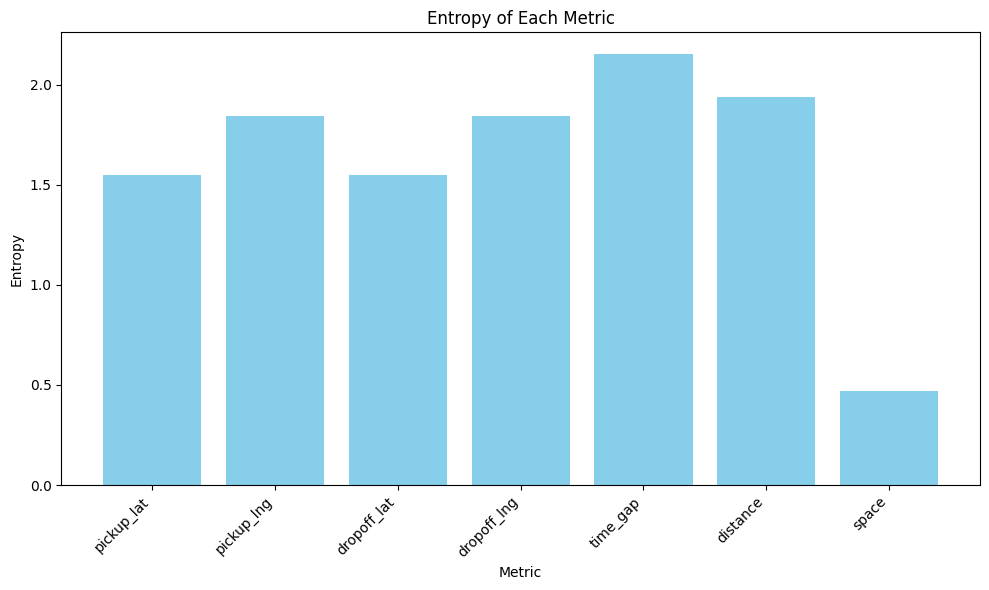

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

def calculate_entropy_and_plot(filepath):
    # Step 1: Load the dataset
    df = pd.read_csv(filepath)
    
    # Step 2: Convert pickup_time and appt_time to datetime objects
    df['pickup_time'] = pd.to_datetime(df['pickup_time'])
    df['appt_time'] = pd.to_datetime(df['appt_time'])
    
    # Calculate the time gap (difference between pickup_time and appt_time)
    df['time_gap'] = (df['appt_time'] - df['pickup_time']).dt.total_seconds() / 60  # Time gap in minutes

    # Step 3: List of columns to analyze
    columns_to_analyze = [
        'pickup_lat', 'pickup_lng', 'dropoff_lat', 'dropoff_lng', 
        'time_gap',  # Use the time gap for entropy calculation
        'distance', 'space'
    ]
    
    # Create a dictionary to store entropy values for each metric
    entropy_values = {}
    
    # Step 4: Process each column
    for column in columns_to_analyze:
        if column in df.columns:
            # For categorical data (e.g., 'space'), we calculate entropy directly
            if df[column].dtype == 'object' or df[column].dtype == 'category':
                # Calculate entropy for categorical variables
                value_counts = df[column].value_counts(normalize=True)
                entropy_values[column] = entropy(value_counts)
            else:
                # For time-related data (e.g., pickup_time, appt_time), handle cyclic nature
                if column == 'time_gap':
                    # Calculate entropy for the time_gap directly
                    binned_data = pd.cut(df[column], bins=10, include_lowest=True)  # You can adjust the number of bins here
                    value_counts = binned_data.value_counts(normalize=True)
                    entropy_values[column] = entropy(value_counts)
                else:
                    # For numerical data, bin it as before
                    num_bins = 10  # You can adjust the number of bins here
                    binned_data = pd.cut(df[column], bins=num_bins, include_lowest=True)
                    # Calculate entropy for the binned data
                    value_counts = binned_data.value_counts(normalize=True)
                    entropy_values[column] = entropy(value_counts)
        else:
            print(f"Column {column} not found in the dataset.")
    
    # Step 5: Plot the entropy values for each column
    plt.figure(figsize=(10, 6))
    plt.bar(entropy_values.keys(), entropy_values.values(), color='skyblue')
    plt.title('Entropy of Each Metric')
    plt.xlabel('Metric')
    plt.ylabel('Entropy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Usage: Pass the path of your dataset (e.g., CSV file) to the function
# calculate_entropy_and_plot('path_to_your_data.csv')


# Usage: Pass the path of your dataset (e.g., CSV file) to the function
csv_name = 'training_data_2024-06-01_995f59317d016879' + '.csv'
calculate_entropy_and_plot(f'C:\\Users\\cyberwitch\\Documents\\code_projects\\ALTR_CORE\\datasets\\live_training\\processed\\{csv_name}')


## Across the training data

### Entropy: A measure of uncertainty or unpredictability
- In the plot below we see the average entropy for each day given the chosen metrics from each dataset starting with the earliest day in the set

- Low entropy: More predictable, structured data. The agent is likely facing a more manageable environment where patterns are easier to identify.

- High entropy: More chaotic or unpredictable data. The agent may need to handle more variability and complexity, which could be more challenging for optimization or learning.

The columns we use to determine entropy are:

- pickup_lat (float)
- pickup_lng (float)
- dropoff_lat (float)
- dropoff_lng (float)
- pickup_time (datetime)
- appt_time (datetime)
- distance (float)
- space (str)

Processing 2024-05-24 (Day 1)
Processing 2024-05-25 (Day 2)
Processing 2024-05-27 (Day 3)
Processing 2024-06-01 (Day 4)
Processing 2024-06-03 (Day 5)
Processing 2024-06-04 (Day 6)
Processing 2024-06-05 (Day 7)
Processing 2024-06-06 (Day 8)
Processing 2024-06-07 (Day 9)
Processing 2024-10-25 (Day 10)
Processing 2024-10-26 (Day 11)
Processing 2024-10-28 (Day 12)
Processing 2024-11-11 (Day 13)
Processing 2024-11-12 (Day 14)
Processing 2024-11-13 (Day 15)
Processing 2024-11-14 (Day 16)
Processing 2024-11-15 (Day 17)
Processing 2024-11-16 (Day 18)
Processing 2024-11-29 (Day 19)


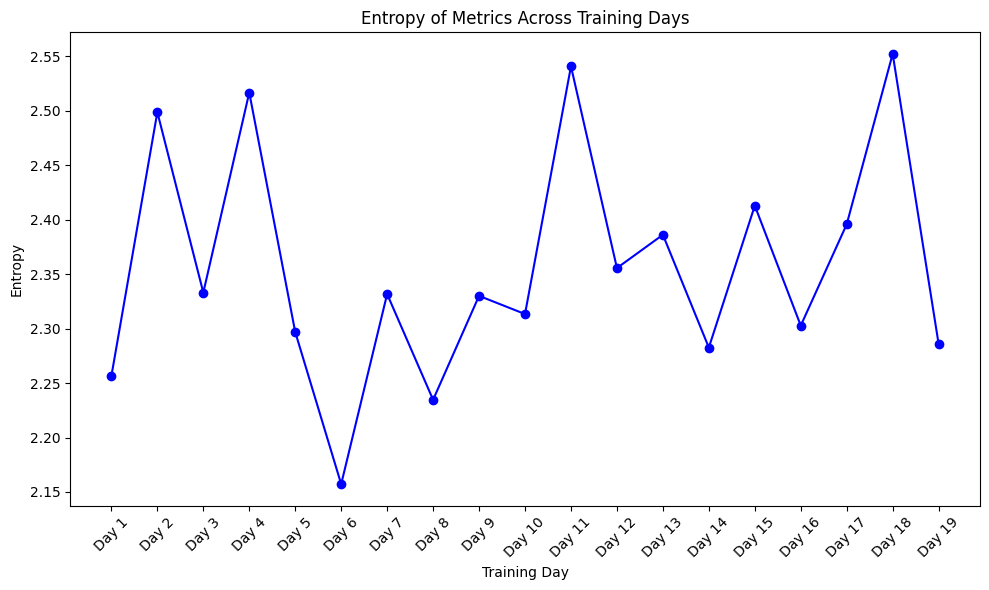

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_entropy(data, metrics):
    """Calculates entropy for specific metrics in the dataset."""
    entropy_values = {}
    for column in metrics:
        if column in data.columns:
            # Ensure the column is numeric and handle missing values
            if data[column].dtype in [np.float64, np.int64]:
                values = data[column].dropna().values

                # Skip columns that are empty after dropping NaNs
                if len(values) == 0:
                    continue

                # Normalize the values to create a probability distribution
                value_counts = np.histogram(values, bins=10)[0]
                value_probs = value_counts / np.sum(value_counts)  # Normalize to probabilities

                # Calculate entropy for the column
                entropy = -np.sum(value_probs * np.log2(value_probs + 1e-9))  # Avoid log(0)
                entropy_values[column] = entropy
    return entropy_values

def process_file(filepath, metrics):
    """Reads a file and processes it to calculate entropy for each day's data."""
    data = pd.read_csv(filepath)  # Assuming CSV format, adjust if using other formats
    return calculate_entropy(data, metrics)

def plot_entropy_over_days(folderpath, metrics):
    """Plot entropy for each day in the provided folderpath."""
    entropy_values_per_day = []
    days = []

    # Get the list of files in the folder and sort them by filename
    filepaths = sorted([os.path.join(folderpath, f) for f in os.listdir(folderpath) if f.endswith('.csv')])

    # Loop through each file (day of data) and calculate entropy
    for day_idx, filepath in enumerate(filepaths):
        filepath_name = filepath.split('\\')[9].split('_')[2]
        print(f"Processing {filepath_name} (Day {day_idx + 1})")  # Print file path and day number for reference
        entropy = process_file(filepath, metrics)
        entropy_values_per_day.append(np.mean(list(entropy.values())))  # Use mean of all metrics' entropy
        days.append(f"Day {day_idx + 1}")

    # Plotting the entropy over days
    plt.figure(figsize=(10, 6))
    plt.plot(days, entropy_values_per_day, marker='o', linestyle='-', color='b')
    plt.title('Entropy of Metrics Across Training Days')
    plt.xlabel('Training Day')
    plt.ylabel('Entropy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Define the metrics you want to track
metrics_to_track = [
    'pickup_lat', 'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'pickup_time', 
    'appt_time', 'distance', 'space'
]

# Example usage
folderpath = r'C:\Users\cyberwitch\Documents\code_projects\ALTR_CORE\datasets\live_training\processed'  # Replace with the path to your folder
plot_entropy_over_days(folderpath, metrics_to_track)
